# Introduction

Do higher film budgets lead to more box office revenue? <br>
Let's find out if there's a relationship using the movie budgets and financial
performance data that I've scraped from [the-numbers.com](
https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use({'figure.facecolor': 'white'})

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


# Explore and Clean the Data

**Challenge**: <br>
Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print(data.shape)

isna_values = data.isna().values.any()
print(isna_values)

duplicate_rows = data.duplicated().values.any()
print(duplicate_rows)

print(data.info())

(5391, 6)
False
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB
None


### Data Type Conversions

**Challenge**: <br>
Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and
`USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
Note that *domestic* in this context refers to the United States.

In [5]:
chars_to_remove = ['$', ',']
columns_to_remove = ['USD_Production_Budget',
                     'USD_Worldwide_Gross',
                     'USD_Domestic_Gross']

for column in columns_to_remove:
    for char in chars_to_remove:
        data[column] = data[column].astype(str).str.replace(char, '')
    data[column] = data[column].astype(float)

**Challenge**: <br>
Convert the `Release_Date` column to a Pandas Datetime type.

In [6]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [7]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00"
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00"
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00"
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00"


### Descriptive Statistics

**Challenge**:
1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue
of any film?
6. How much revenue did the lowest and highest budget films make?

In [8]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [9]:
data[data['USD_Production_Budget'] == data['USD_Production_Budget'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,"425,000,000.00","2,783,918,982.00","760,507,625.00"


In [10]:
data[data['USD_Worldwide_Gross'] == data['USD_Worldwide_Gross'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,"425,000,000.00","2,783,918,982.00","760,507,625.00"


In [11]:
data[data['USD_Worldwide_Gross'] == data['USD_Worldwide_Gross'].min()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00
6,4630,1927-12-08,Wings,"2,000,000.00",0.00,0.00
8,4240,1930-01-01,Hell's Angels,"4,000,000.00",0.00,0.00
17,4814,1936-10-20,"Charge of the Light Brigade, The","1,200,000.00",0.00,0.00
27,4789,1941-10-28,How Green Was My Valley,"1,250,000.00",0.00,0.00
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,"15,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5389,1119,2020-12-31,Hannibal the Conqueror,"50,000,000.00",0.00,0.00


# Investigating the Zero Revenue Films

**Challenge**: <br>
How many films grossed $0 domestically (i.e., in the United States)? <br>
What were the highest budget films that grossed nothing?

In [12]:
num_of_zero_usa_gross = data[data['USD_Domestic_Gross'] ==
                             data['USD_Domestic_Gross'].min()].\
    count()['USD_Domestic_Gross']
num_of_zero_usa_gross

512

In [13]:
high_budget_zero_gross = data[data['USD_Domestic_Gross'] == 0].\
    sort_values('USD_Production_Budget', ascending=False).head()
high_budget_zero_gross

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla","80,000,000.00","4,547,660.00",0.00


**Challenge**: <br>
How many films grossed $0 worldwide? <br>
What are the highest budget films that had no revenue internationally?

In [14]:
num_of_zero_ww_gross = data[data['USD_Worldwide_Gross'] == 0].\
    count()['USD_Worldwide_Gross']
num_of_zero_ww_gross

357

In [15]:
high_budget_zero_ww_gross = data[data['USD_Worldwide_Gross'] == 0].\
    sort_values('USD_Production_Budget', ascending=False).head(10)
high_budget_zero_ww_gross

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5058,880,2015-11-12,The Ridiculous 6,"60,000,000.00",0.00,0.00
5338,879,2017-04-08,The Dark Tower,"60,000,000.00",0.00,0.00
5389,1119,2020-12-31,Hannibal the Conqueror,"50,000,000.00",0.00,0.00
5092,1435,2015-12-31,The Crow,"40,000,000.00",0.00,0.00
3300,1631,2008-12-31,Black Water Transit,"35,000,000.00",0.00,0.00
5045,1656,2015-10-30,Freaks of Nature,"33,000,000.00",0.00,0.00


### Filtering on Multiple Conditions

**Challenge**: <br>
Use the [`.query()` function](
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html)
to accomplish the same thing. <br>
Create a subset for international releases that had some worldwide gross revenue,
but made zero revenue in the United States. <br>
*Hint*: <br>
This time you'll have to use the `and` keyword.

In [16]:
data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,"3,380,000.00","3,220.00",0.00
1579,5087,2001-02-11,Everything Put Together,"500,000.00","7,890.00",0.00
1744,3695,2001-12-31,The Hole,"7,500,000.00","10,834,406.00",0.00
2155,4236,2003-12-31,Nothing,"4,000,000.00","63,180.00",0.00
2203,2513,2004-03-31,The Touch,"20,000,000.00","5,918,742.00",0.00
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,"36,000,000.00","1,480,089.00",0.00
5348,2225,2017-05-05,Chāi dàn zhuānjiā,"23,000,000.00","58,807,172.00",0.00
5360,4832,2017-07-03,Departure,"1,100,000.00","27,561.00",0.00
5372,1856,2017-08-25,Ballerina,"30,000,000.00","48,048,527.00",0.00


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection
(May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to
be screened in the box office?
* Create another DataFrame called data_clean that does not include these films. 

In [17]:
scrape_date = pd.Timestamp('2018-5-1')

In [18]:
not_released = data[data['Release_Date'] > scrape_date]

num_of_not_released = not_released.count()['Rank']
# print(num_of_not_released)

data_clean = data.drop(not_released.index)
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00"
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00"
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00"
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00"
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,"40,000,000.00","166,893,990.00","92,029,184.00"
5380,70,2017-10-03,Kong: Skull Island,"185,000,000.00","561,137,727.00","168,052,812.00"
5381,94,2017-12-05,King Arthur: Legend of the Sword,"175,000,000.00","140,012,608.00","39,175,066.00"
5382,1254,2017-12-05,Snatched,"42,000,000.00","57,850,343.00","45,850,343.00"


### Films that Lost Money

**Challenge**: <br>
What is the percentage of films where the production costs exceeded the
worldwide gross revenue?

In [19]:
num_of_all = data_clean.count()['Rank']

budget_over_revenue = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
num_of_budget_over_revenue = budget_over_revenue.count()['Rank']

percentage_of_lost = num_of_budget_over_revenue / num_of_all * 100
print(f"Percentage of Movies that Lost Money = {percentage_of_lost:.1f} %")

Percentage of Movies that Lost Money = 37.3 %


# Seaborn for Data Viz: Bubble Charts

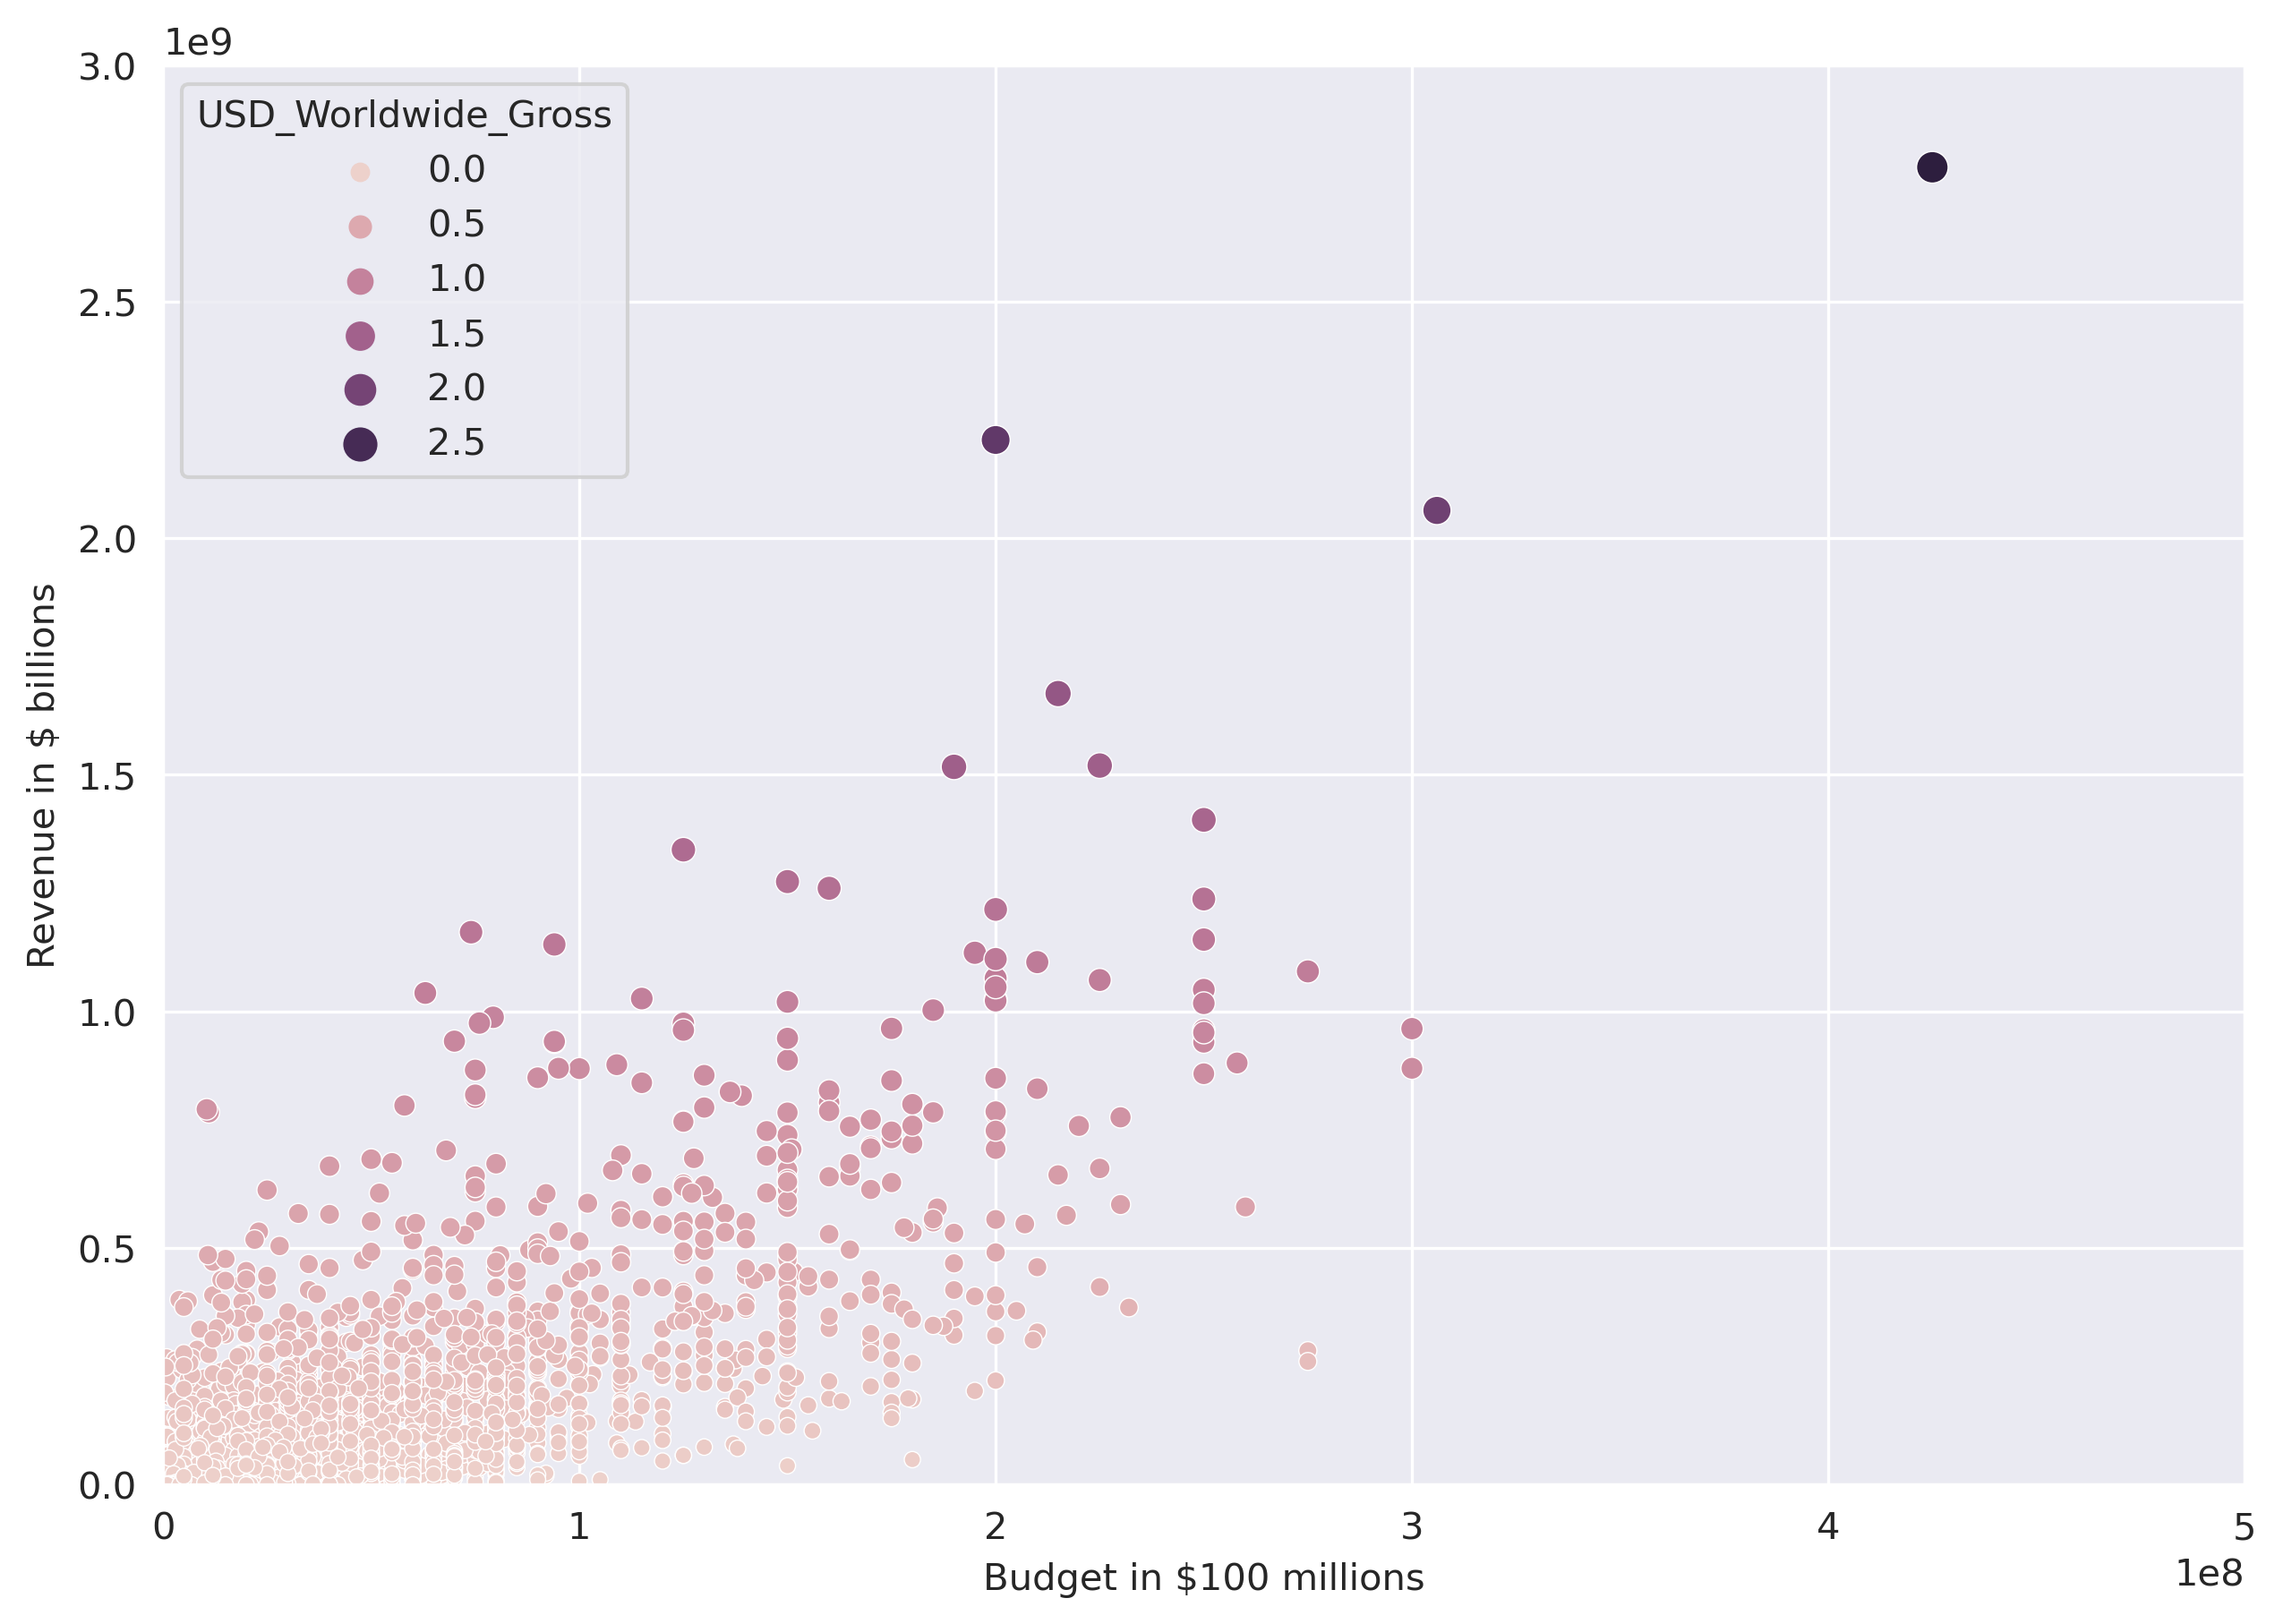

In [20]:
plt.figure(figsize=(10,7), dpi=300)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                         x='USD_Production_Budget',
                         y='USD_Worldwide_Gross',
                         hue='USD_Worldwide_Gross',
                         size='USD_Worldwide_Gross')
    ax.set(ylim=(0, 3e9),
           xlim=(0, 5e8),
           ylabel='Revenue in $ billions',
           xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: <br>
Try to create the following Bubble Chart:

<img src='USD_Worldwide_Gross.png'>

In [ ]:
plt.figure(figsize=(10,7), dpi=300)

with sns.axes_style('dark'):
    ax = sns.scatterplot(data=data_clean,
                         x='Release_Date',
                         y='USD_Production_Budget',
                         hue='USD_Worldwide_Gross',
                         size='USD_Worldwide_Gross')
    ax.set(ylim=(0, 4.5e8),
           xlim=(data_clean['Release_Date'].min(),
                 data_clean['Release_Date'].max()),
           ylabel='Budget in $100 millions',
           xlabel='Year')

# Converting Years to Decades Trick

**Challenge**: <br>
Create a column in `data_clean` that has the decade of the release.

<img src="https://i.imgur.com/0VEfagw.png" width=650>

Here's how: 
1. Create a [`DatetimeIndex` object](
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html)
from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.

<img src=https://i.imgur.com/5m06Ach.png width=650>

3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [22]:
datetime_obj = pd.DatetimeIndex(data_clean['Release_Date'])
years = datetime_obj.year
decades = datetime_obj.year // 10 * 10

In [23]:
data_clean.insert(2, 'Decade', decades)
data_clean

,Rank,Release_Date,Decade,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,1910,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00"
1,5140,1916-05-09,1910,Intolerance,"385,907.00",0.00,0.00
2,5230,1916-12-24,1910,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00"
3,5299,1920-09-17,1920,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00"
4,5222,1925-01-01,1920,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00"
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,2010,John Wick: Chapter Two,"40,000,000.00","166,893,990.00","92,029,184.00"
5380,70,2017-10-03,2010,Kong: Skull Island,"185,000,000.00","561,137,727.00","168,052,812.00"
5381,94,2017-12-05,2010,King Arthur: Legend of the Sword,"175,000,000.00","140,012,608.00","39,175,066.00"
5382,1254,2017-12-05,2010,Snatched,"42,000,000.00","57,850,343.00","45,850,343.00"


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: <br>
Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [24]:
old_movies = data_clean.query('Decade < 1970')
new_movies = data_clean.query('Decade >= 1970')

In [25]:
num_old_movies = old_movies.count()['Decade']
num_new_movies = new_movies.count()['Decade']

print(f"Number of 'old movies' = {num_old_movies} \n"
      f"Number of 'new movies' = {num_new_movies}")

Number of 'old movies' = 153 
Number of 'new movies' = 5231


# Seaborn Regression Plots

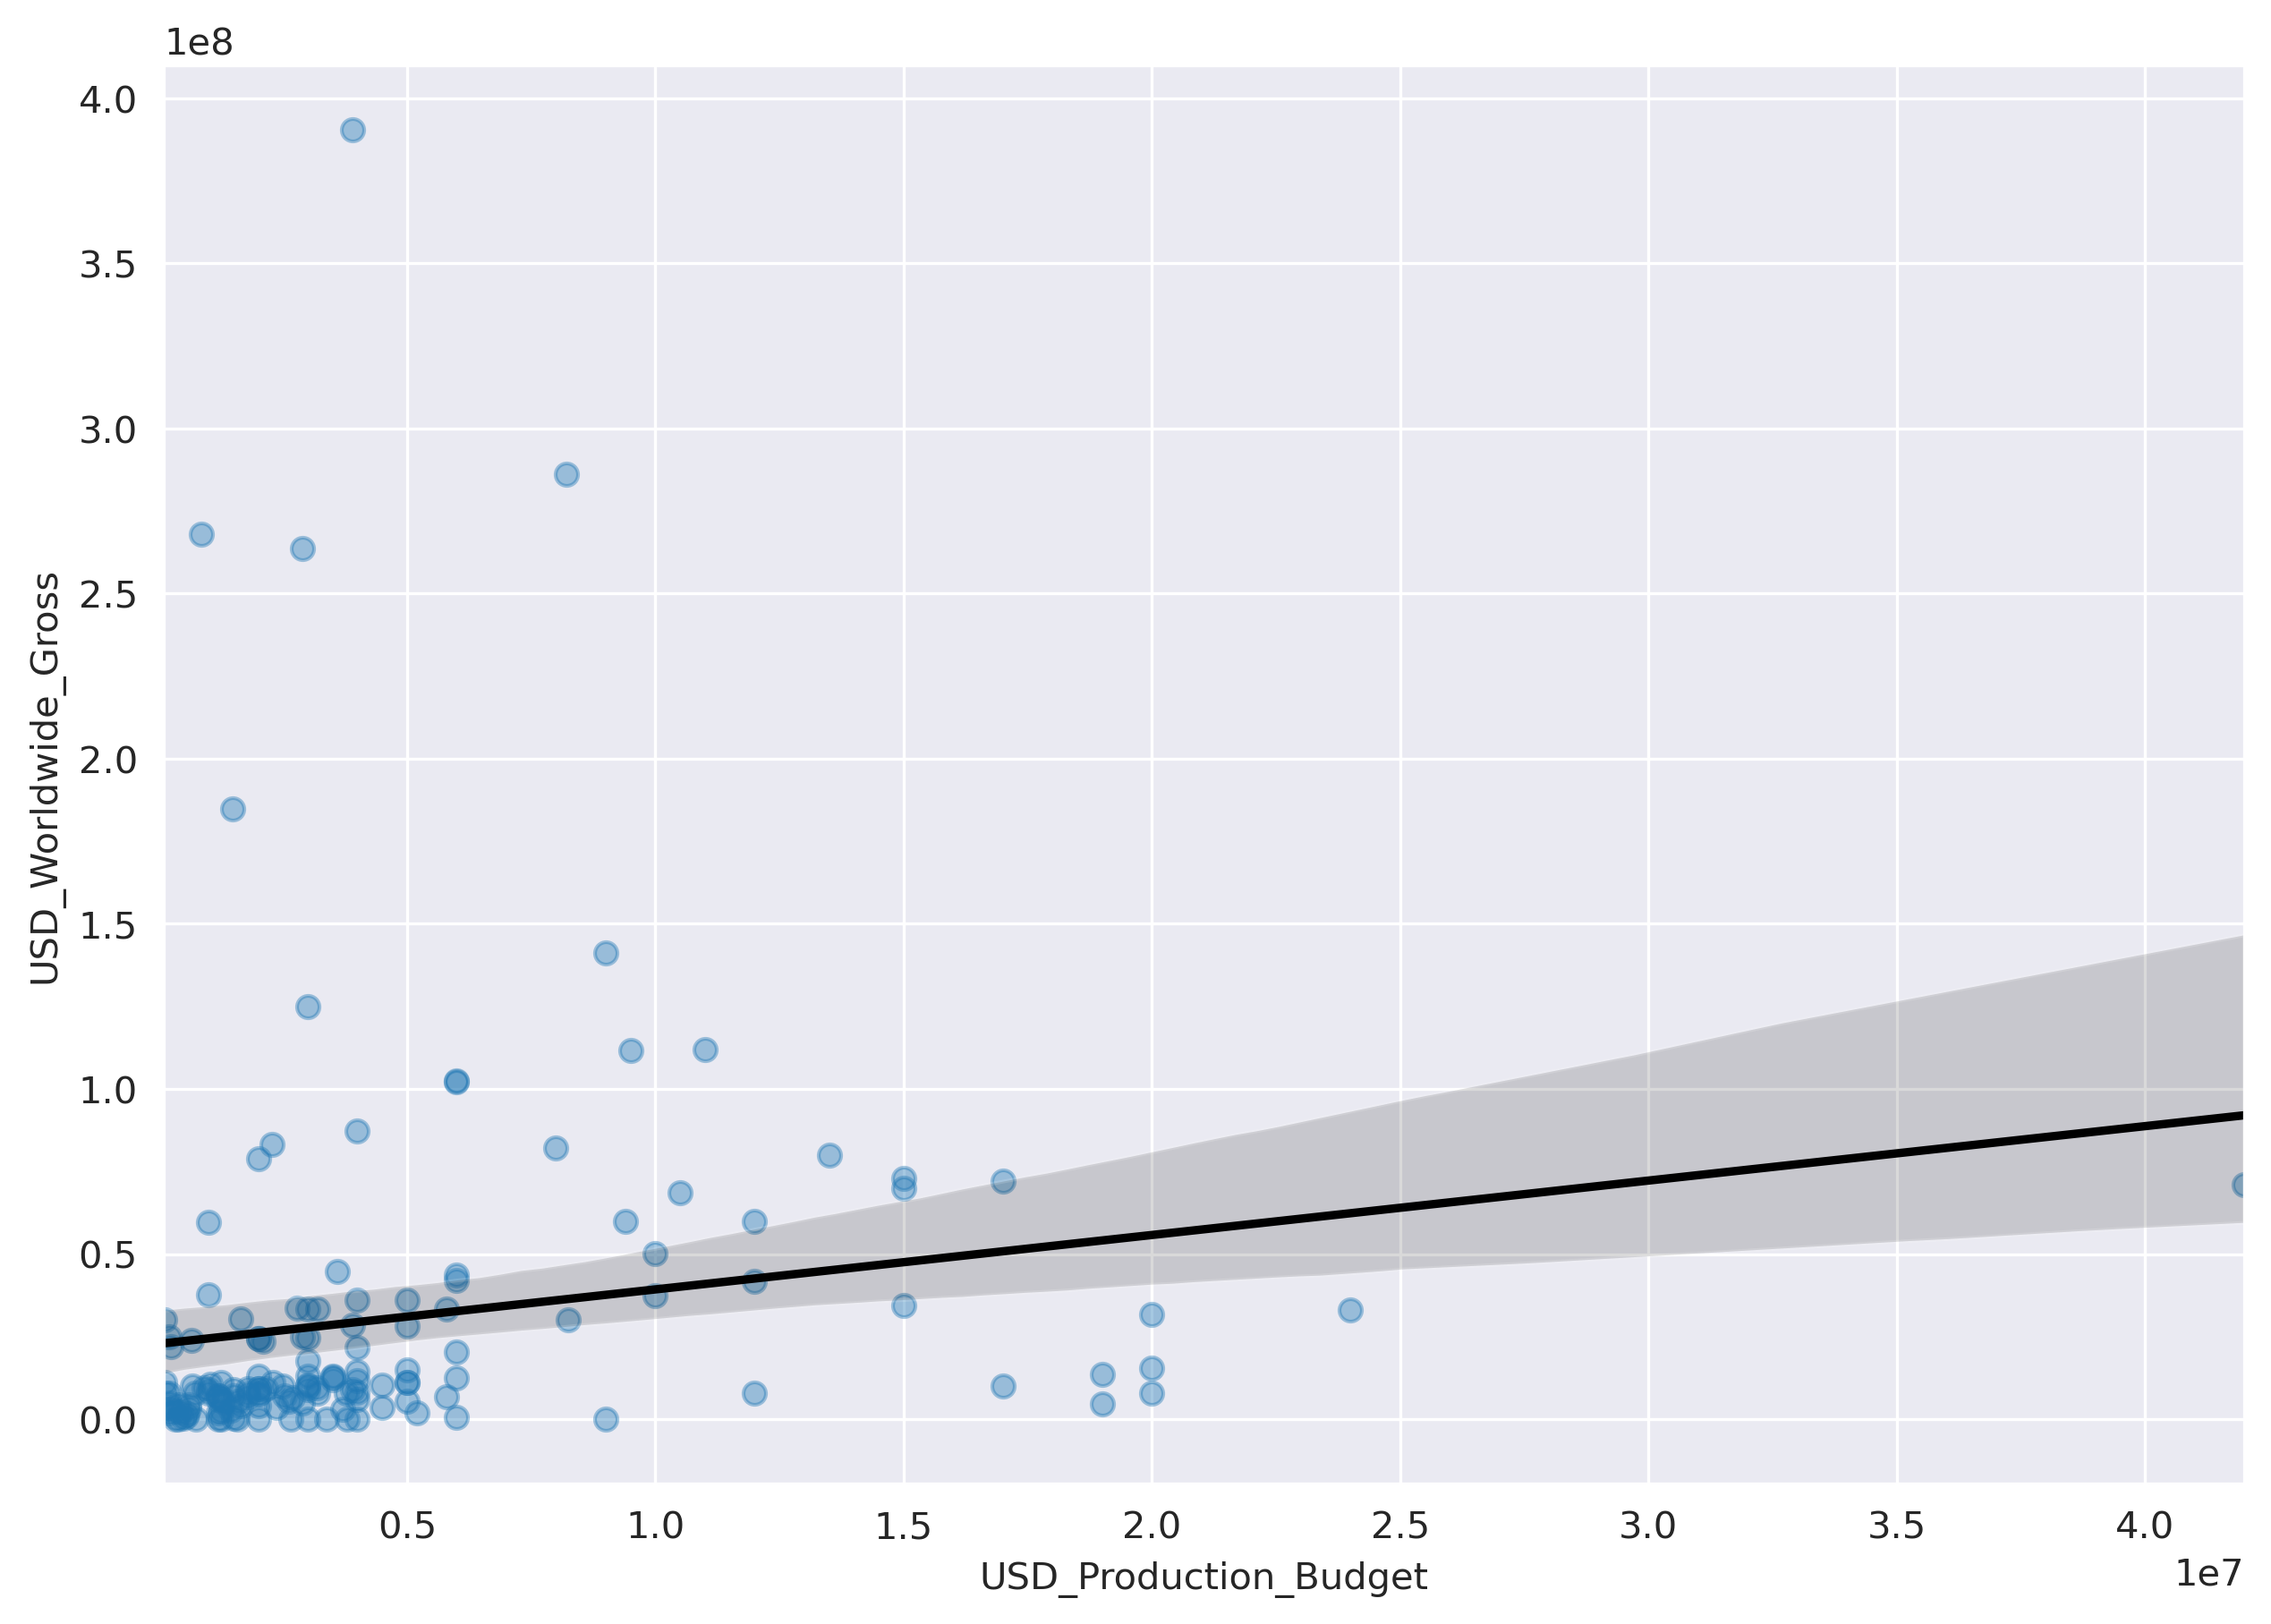

In [28]:
plt.figure(figsize=(10,7), dpi=300)

with sns.axes_style('darkgrid'):
    sns.regplot(data=old_movies,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'black'})

**Challenge**: <br>
Use Seaborn's `.regplot()` to show the scatter plot and linear regression line
against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line.
Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear
regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to
the regression line?

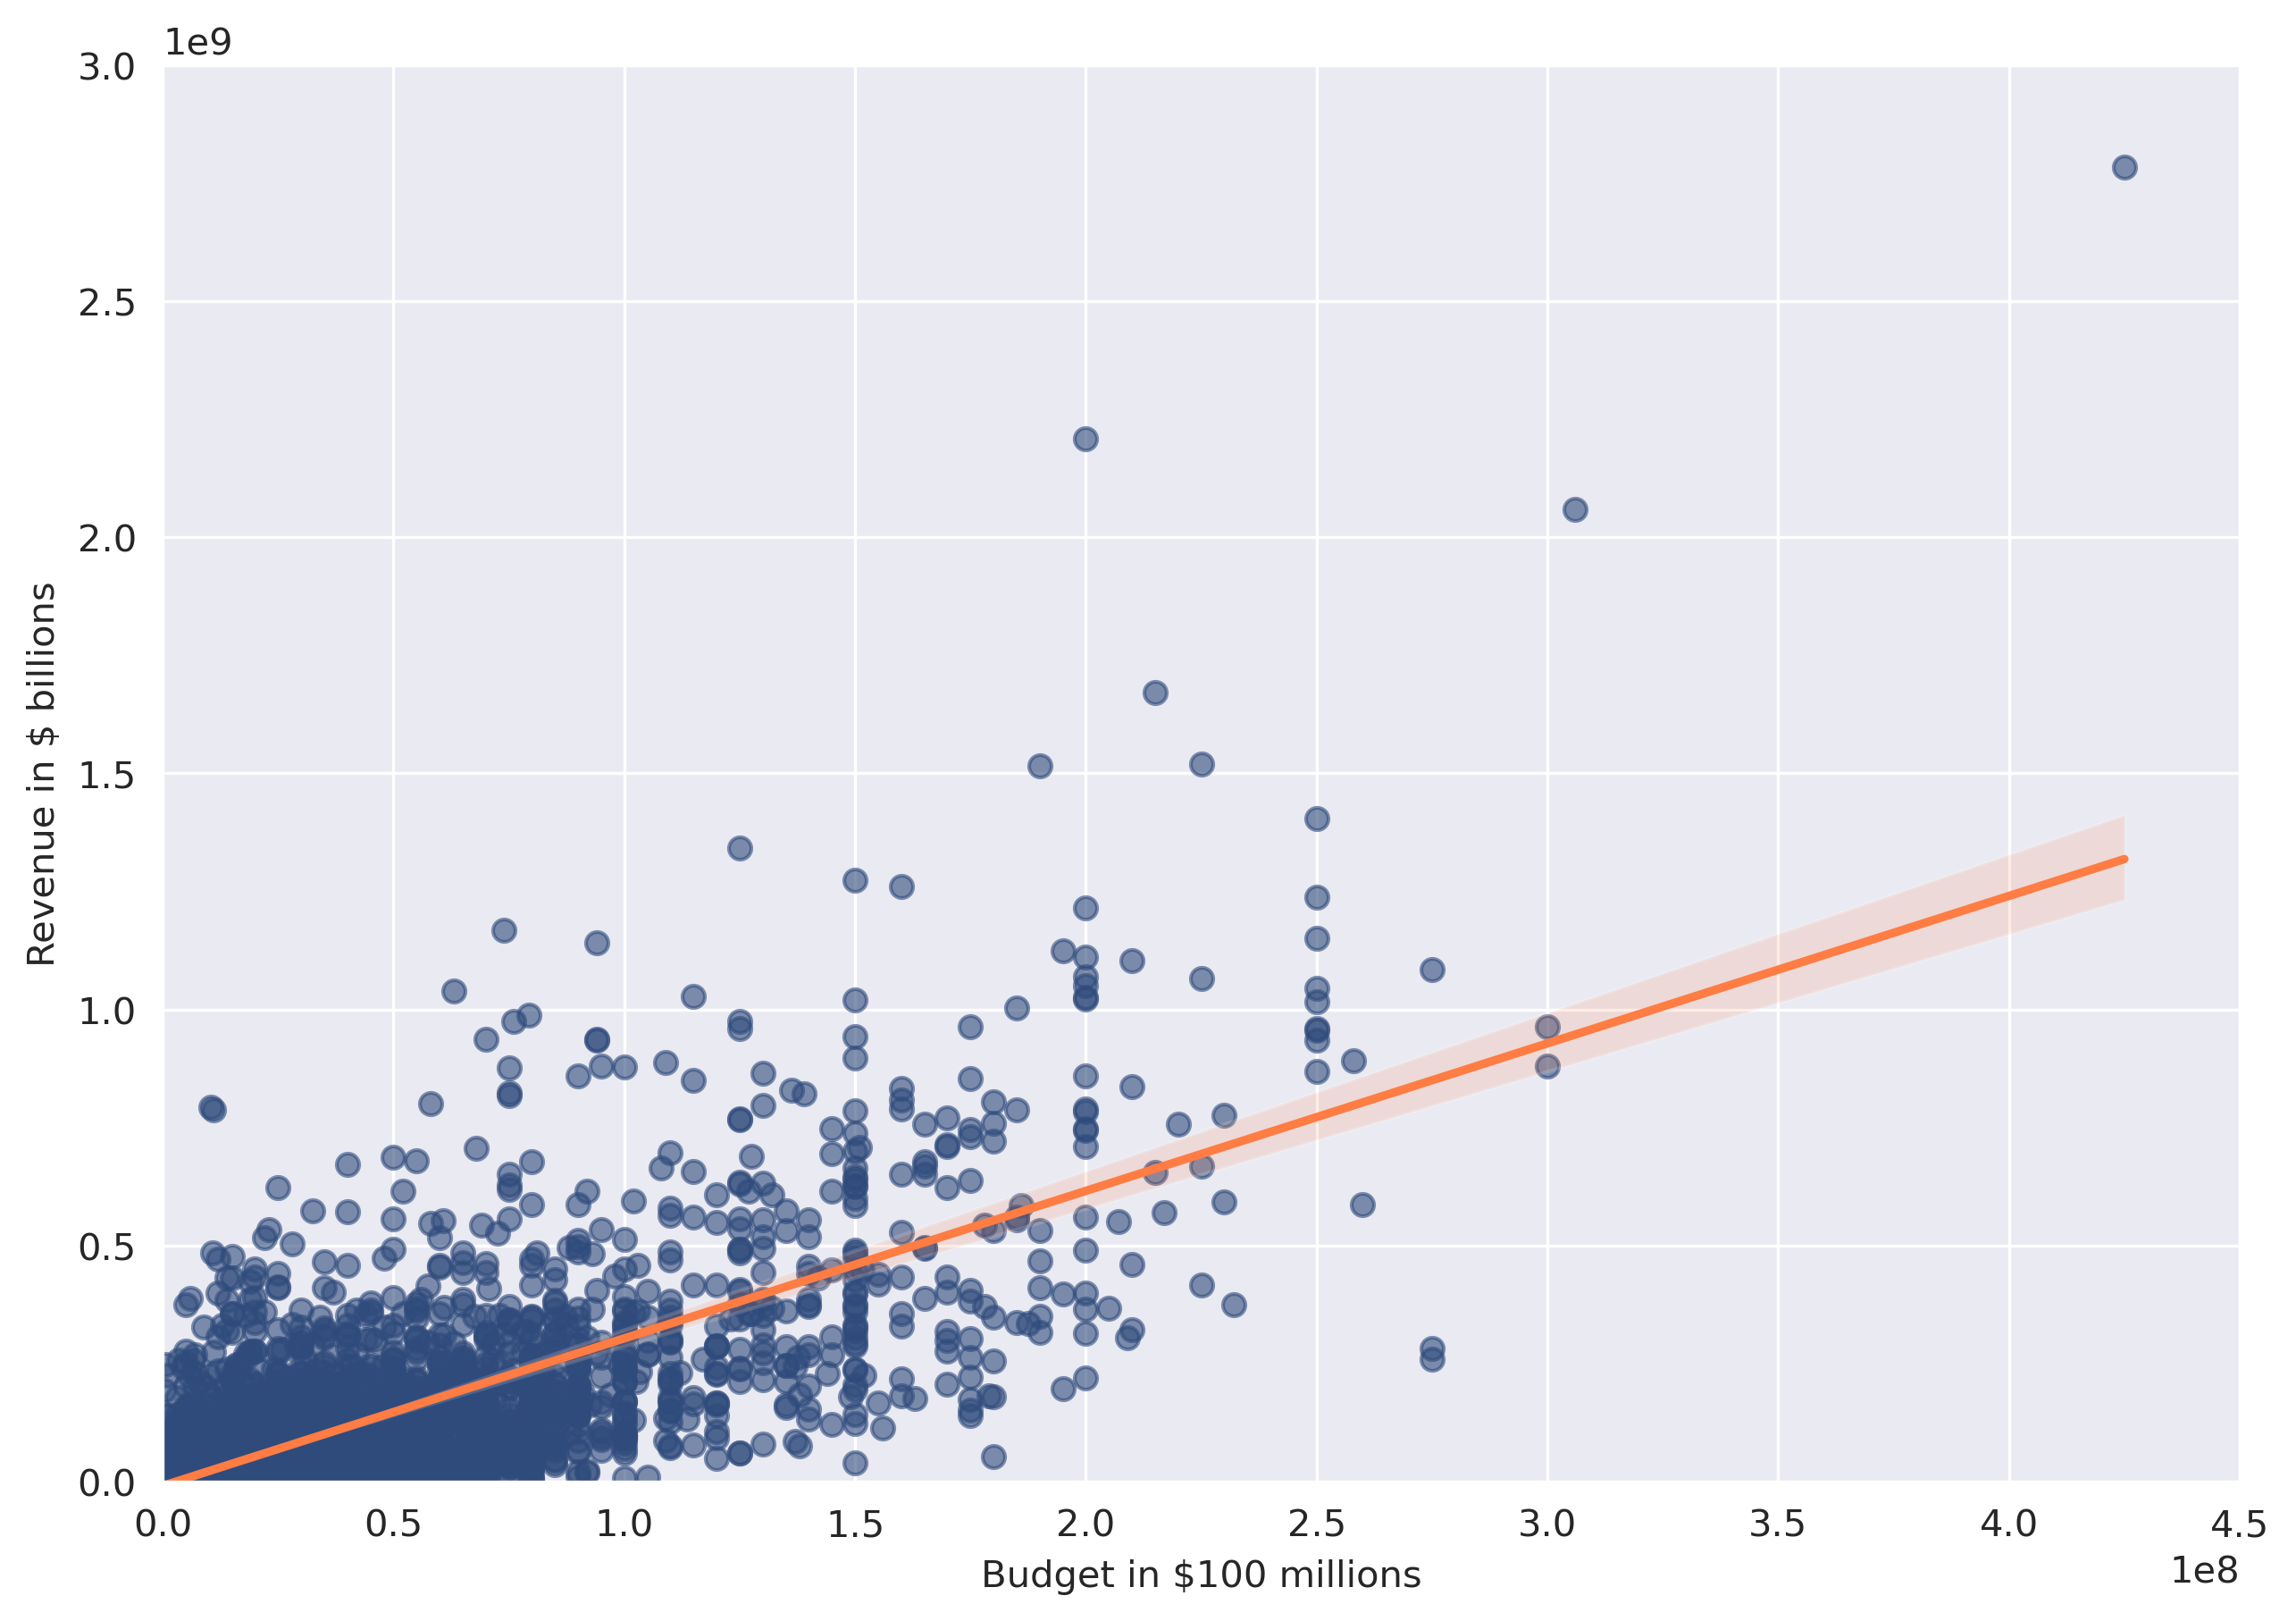

In [32]:
plt.figure(figsize=(10, 7), dpi=300)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=new_movies,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                scatter_kws={'alpha': 0.6,
                             'color': '#2f4b7c'},
                line_kws={'color': '#ff7c43'})
    ax.set(xlim=(0, 4.5e8),
           ylim=(0, 3e9),
           xlabel='Budget in $100 millions',
           ylabel='Revenue in $ billions')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [39]:
regression = LinearRegression()

X = pd.DataFrame(new_movies, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_movies, columns=['USD_Worldwide_Gross'])

In [40]:
regression.fit(X, y)

LinearRegression()

In [70]:
theta_zero = regression.intercept_[0]
theta_one = regression.coef_[0, 0]

print(f"theta_0 = {theta_zero:,.2f} €")
print(f"theta_1 = {theta_one:,.2f}")

theta_0 = -8,650,768.01 €
theta_1 = 3.12


In [71]:
regression.score(X, y)

0.5577032617720403

**Challenge**: <br>
Run a linear regression for the `old_films`. <br>
Calculate the intercept, slope and r-squared. <br>
How much of the variance in movie revenue does the linear model explain in
this case?

In [72]:
X_old = pd.DataFrame(old_movies, columns=['USD_Production_Budget'])
y_old = pd.DataFrame(old_movies, columns=['USD_Worldwide_Gross'])

In [73]:
regression.fit(X_old, y_old)

LinearRegression()

In [74]:
theta_zero_old = regression.intercept_[0]
theta_one_old = regression.coef_[0, 0]

print(f"theta_0 = {theta_zero_old:,.2f} €")
print(f"theta_1 = {theta_one_old:,.2f}")

theta_0 = 22,821,538.64 €
theta_1 = 1.65


In [75]:
regression.score(X_old, y_old)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! <br>
Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  <br>
How much global revenue does our model estimate for a film with a budget of
$350 million?

In [78]:
budget = 350e6
estimated_revenue = theta_zero_old + theta_one_old * budget
print(f"Estimated Revenue with {budget:,.2f} € of budget "
      f"is: {estimated_revenue:,.2f} €.")

Estimated Revenue with 350,000,000.00 € of budget is: 599,521,139.04 €.
